# SPRINT 8

Antes de empezar a desarrollar las graficas, establecemos una conexion con la base de datos atraves de una función en python logramos extraer de forma innata las tablas y datos según el orden de origen, el mismo codigo provee el cierre de conexión para segurar el consumo adicional de recursos. En el Desarrollo de este sprint, cuando usemos datos de otra base de datos siempre usaremos este script para su extración

In [14]:
########################################### FASE 1 ############################################ 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mysql.connector
db = mysql.connector.connect(host='127.0.0.1',
                            port='3306',
                            database='db_sprint4',  # se cambia la bases de datos
                            user='root',
                            password='121212')

def load_table_to_dataframe(db, cursor, table_name):             # Cargo c/tabla en un Pandas DataFrame.                                                     
    try:
        df = pd.DataFrame()                                      # Creo un DataFrame vacío para la tabla
        cursor.execute(f"SELECT * FROM {table_name}")            # Ejecuto la consulta para extraer tablas
        column_names = [col[0] for col in cursor.description]    # Obtengo los nombres de las columnas
        data = cursor.fetchall()
        data_list = []                                           # Convierto los datos a un formato Dataframe
        for row in data:
            data_list.append(list(row))
        df = pd.DataFrame(data_list, columns=column_names)       # Creo el DataFrame (datos y nombres de columnas)
        return df
    except Exception as e:
        print(f"Error loading table '{table_name}':", e)
        return None

cursor = db.cursor()
cursor.execute("SHOW TABLES")
tables = [tabla[0] for tabla in cursor.fetchall()]
print('-'*55)
print('           >>>> DATAFRAMES ENCONTRADOS <<<<')
print('-'*55)

for table_name in tables:
    df_name = f"df_{table_name.lower()}"  # Convierto el nombre de la tabla a minúsculas con prefijo 'df_'
    df = load_table_to_dataframe(db, cursor, table_name)
    if df is None:
        continue

    globals()[df_name] = df  # Creo una variable global con el nombre dinámico y configuro en el DataFrame
    print(f"DataFrame: {df_name}")  # Imprimo el nombre del DataFrame
    
cursor.close()  # Desconexión
db.close()

-------------------------------------------------------
           >>>> DATAFRAMES ENCONTRADOS <<<<
-------------------------------------------------------
DataFrame: df_card_status
DataFrame: df_companies
DataFrame: df_credit_cards
DataFrame: df_products
DataFrame: df_transactions
DataFrame: df_transactions_products
DataFrame: df_transactions_products_b
DataFrame: df_users
DataFrame: df_vista1


In [8]:
# Comporbamos si funciona
df_users.head(2)

,id,name,surname,phone,email,birth_date,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,"Nov 17, 1985",United States,Lowell,73544,348-7818 Sagittis St.
1,2,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,"Aug 23, 1992",United States,Des Moines,59464,903 Sit Ave


# Nivel 1
## ejercicio 1
### Una variable numérica.

1. Creación del histograma:
Se utiliza la función sns.histplot para crear un histograma de la variable amount extraída del DataFrame df_transactions.
La opción kde=True indica que se superponga una curva de densidad de kernel al histograma.

2. Configuración del tema de Seaborn:
Se llama a la función sns.set_theme para establecer el tamaño de la figura (figure.figsize) a 7 pulgadas de ancho y 5 pulgadas de alto.
Esto ajusta el tamaño del lienzo donde se visualizará el histograma.

3. Personalización de las etiquetas y el título:
Se utiliza la función plt.xticks para rotar las etiquetas del eje X en 75 grados y ajustar el tamaño de la fuente a 8 puntos.
Se utiliza la función plt.title para establecer el título del gráfico como "Distribución de Montos por Transacción".
Se utilizan las funciones plt.xlabel y plt.ylabel para etiquetar los ejes X e Y como "Monto de la Transacción" y "Cantidad de Transacciones", respectivamente.

4. Ajustes finales y visualización:
Se llama a la función plt.tight_layout para ajustar automáticamente el espacio entre el gráfico y los bordes de la figura.
Se llama a la función plt.show() para mostrar el histograma creado.
En resumen:

Este código crea un histograma con KDE de la variable amount en df_transactions, personaliza el tema de Seaborn, ajusta las etiquetas y el título del gráfico, y muestra el resultado final.

INTERPRETACION:
La distribución parece ser bimodal, lo que significa que hay dos picos o concentraciones de transacciones en diferentes rangos de montos. Un pico se observa alrededor de los 100-200, mientras que el otro se encuentra cerca de los 400-500.
El histograma evidencia data relevante sobre las cantidades de transacciones realizadas por rangos de monto.  
La distribución en el histograma parece ser ligeramente asimétrica hacia la derecha, lo que indica que hay más transacciones con montos altos que con montos bajos.

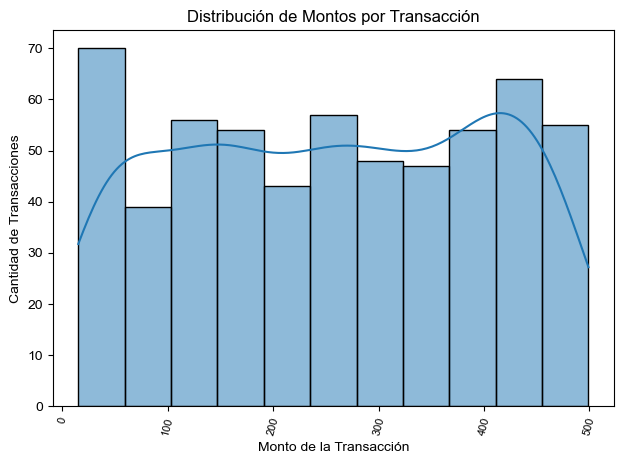

In [3]:
sns.histplot( data=df_transactions['amount'], kde=True )

sns.set_theme(rc={'figure.figsize': (7, 5)})
plt.xticks(rotation=75, fontsize=8)
plt.title("Distribución de Montos por Transacción")
plt.xlabel("Monto de la Transacción")
plt.ylabel("Cantidad de Transacciones")
plt.tight_layout()
plt.show()

## Ejercicio 2
### Dos variables numéricas.

Este código de Python utiliza librerías que se importaron al inicio del sprint y se guardan en memoria como pandas, seaborn entre otras para analizar y visualizar datos de los DataFrames necesarios respectivamente.

Fusionar DataFrames (df_transactions y df_companies):
El código se utiliza pd.mergepara combinar dos DataFrames, que probablemente df_transactionscontengan detalles de la transacción e df_companiesinformación de la empresa.
La combinación se basa en las columnas business_iden df_transactionsy company_iden df_companies. Esto supone que estas columnas vinculan las transacciones con sus respectivas empresas.
El how='inner'argumento garantiza que solo las filas con ID coincidentes en ambos DataFrames se mantengan en el resultado combinado. Esto crea un nuevo DataFrame llamado df.

DIAGRAMA DISPERSIÓN:
- sns.scatterplotSe utiliza para visualizar los datos en formato df.
El diagrama de dispersión muestra la relación entre dos variables:
- Eje x: company_id probablemente representa el identificador único de cada empresa involucrada en las transacciones.
- Eje y: amount - Esto presumiblemente representa el monto de la transacción asociada con cada empresa.

PERSONALIZACION Y VISUALIZACION:
sns.set_themeestablece el tamaño de la figura en un formato más amplio (10x5) para una mejor 
plt.xticks(rotation=75, fontsize=5)rota las etiquetas de identificación de la empresa en el eje x para una mejor legibilidad debido a una posible aglomeración. El tamaño de fuente también se ajusta a 5.
Se agregan títulos y etiquetas para mayor claridad:
Title: "Distribución de transacciones" (Transaction Distribution)
Etiqueta del eje X: "Compañias" (Empresas)
Etiqueta del eje Y: "Transacciones" (Transacciones)
Finalmente, plt.show()muestra el diagrama de dispersión generado.

RESUMEN
este fragmento de código combina datos de transacciones y de empresas y luego crea un diagrama de dispersión para visualizar la distribución de los montos de las transacciones entre diferentes empresas.

INTERPRETACION
Se observan algunas empresas con un número significativamente mayor de transacciones que otras. Esto sugiere que estas empresas tienen una participación dominante en el mercado o son más populares entre los consumidores.
La distribución muestra una variedad de empresas con diferentes niveles de actividad transaccional. Esto indica que el mercado no está monopolizado del todo por unas pocas empresas y que hay cierta competencia del resto

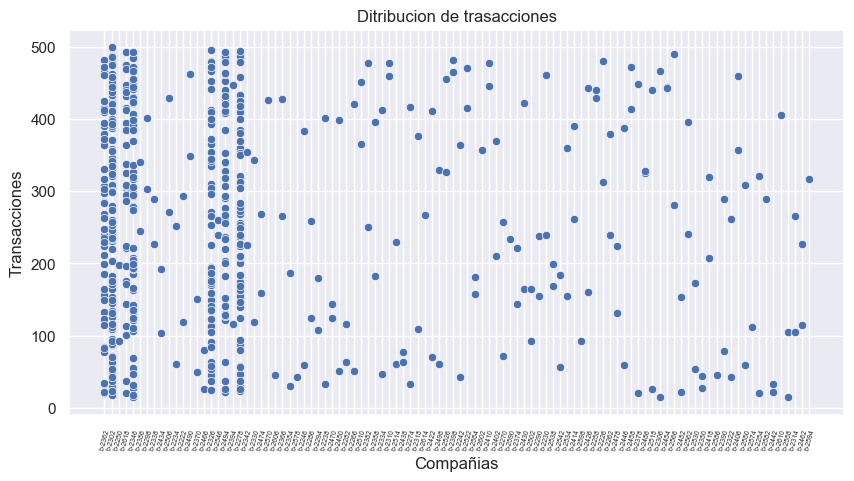

In [14]:
df = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id', how='inner')

sns.scatterplot(data=df, x='company_id', y='amount')

sns.set_theme(rc={'figure.figsize':(10, 5)})  
plt.xticks(rotation=75, fontsize=5)
plt.title("Ditribucion de trasacciones")
plt.xlabel("Compañias")
plt.ylabel("Transacciones")
plt.show()

## Ejercicio 3
### Una variable categórica.

Este código de Python utiliza librerías que se importaron al inicio del sprint y se guardan en memoria como pandas, seaborn entre otras para analizar y visualizar datos de los DataFrames necesarios respectivamente.

Extrae la columna country del DataFrame df_companies.
Utiliza el método value_counts() para contar la frecuencia de aparición de cada país (valor único) en la columna.
Ordena el resultado de mayor a menor con .head(10) para obtener los 10 países con más empresas.
Almacena este conteo en un nuevo DataFrame llamado country_counts.

GRAFICO:
Utiliza seaborn.barplot para generar un gráfico de barras.
Define el eje x (x) con los índices del DataFrame country_counts (nombres de los países).
Define el eje y (y) con los valores del DataFrame country_counts (número de empresas por país).
Configura y muestra el gráfico:

CONFIGURACION:
Ajusta el tamaño de la figura con sns.set_theme(rc={'figure.figsize':(6, 4)}).
Agrega etiquetas para los ejes x (plt.xlabel('Country')) y en el eje y (plt.ylabel('Number of Companies')).
Establece un título para el gráfico (plt.title('Los 10 paises con mayor numero de compañias')).
Rota las etiquetas del eje x para mejor visualización (plt.xticks(rotation=45, fontsize=10)).
Ajusta el espacio entre elementos del gráfico con plt.tight_layout().
Muestra el gráfico con plt.show().

INTERPRETACION
El gráfico permite visualizar fácilmente la distribución de las empresas por país.
En este grafico se muestra a los 10 países con mayor número de compañías registradas dirigidos al lado izquierdo, represetando por paises nórdicos y anglo. 

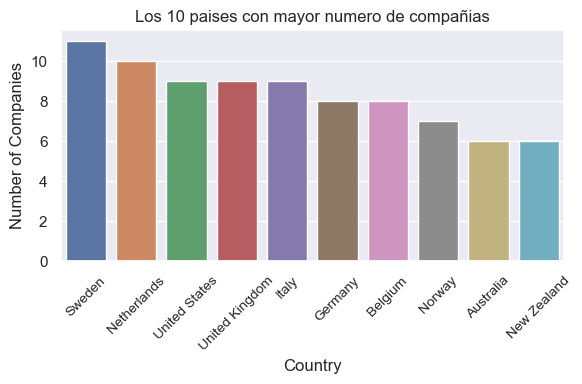

In [20]:
country_counts = df_companies['country'].value_counts().head(10)

sns.barplot(x=country_counts.index, y=country_counts.values)

sns.set_theme(rc={'figure.figsize':(6, 4)})  
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.title('Los 10 paises con mayor numero de compañias')
plt.xticks(rotation=45, fontsize=10)  
plt.tight_layout()
plt.show()

# - Ejercicio 4
### Una variable categórica y una numérica.

Este código de Python utiliza librerías que se importaron al inicio del sprint y se guardan en memoria como pandas, seaborn entre otras para analizar y visualizar datos de los DataFrames necesarios respectivamente.

Este código analiza transacciones agrupadas por país para entender la distribución de montos:

UNION DATAFRAMES:
Fusiona dos DataFrames (df_transactions y df_companies) en uno nuevo llamado df. La combinación se realiza utilizando la columna business_id de df_transactions y la columna company_id de df_companies, y solo se conservan las filas donde ambos identificadores coinciden (inner join).

Ademas, calculamos montos por país, agrupamos el DataFrame combinado df por la columna country. Luego, para cada grupo (país), calcula la suma de la columna amount. El resultado se almacena en una nueva serie montos_pais, donde el índice representa el país y los valores son los montos totales por país.

Ordenar montos: Ordena la serie montos_pais en orden descendente con (ascending=False) según los montos totales. De esta forma, los países con mayor suma de montos aparecerán primero.

GRAFICO Y CONFIGURACION:
Crea un diagrama de barras utilizando la librería seaborn. El eje x representa los países (obtenidos del índice de montos_pais) y el eje y representa los montos totales por país (valores de montos_pais).
Se configura el tamaño de la figura, las etiquetas de los ejes, el título del gráfico, la rotación y tamaño de las etiquetas del eje x, y ajusta el espacio entre elementos del gráfico para una mejor visualización.
Mostramos el diagrama de barras creado con sns.barplot.

RESUMEN:
Este código proporciona una visión general de la distribución de montos de transacciones agrupados por país. El diagrama de barras permite identificar fácilmente qué países tienen los montos totales más altos en el conjunto de datos analizado.

INTERPRETACION
En este grafico se denota que hay 2 países (Germany, United Kingdom) que lideran transacciones sueriores a 25000, 6 países (Germany, United Kingdom, Sweden, Norway, Ireland, Canada) superan los 15000, en resumen el patron indica que hay mas de la mitad de paises que no superan los 5000, a excepción Canada que ha pasado con las justas.

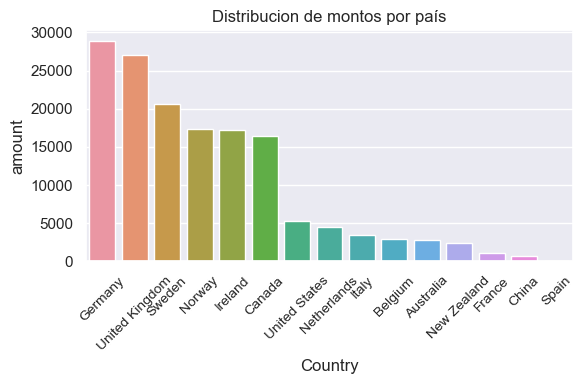

In [21]:
df = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id', how='inner')
montos_pais = df.groupby('country')['amount'].sum()
montos_pais = montos_pais.sort_values(ascending=False)

sns.barplot(x=montos_pais.index, y=montos_pais)

sns.set_theme(rc={'figure.figsize':(6, 5)})  
plt.xlabel('Country')
plt.ylabel('amount')
plt.title('Distribucion de montos por país')
plt.xticks(rotation=45, fontsize=10)  
plt.tight_layout()
plt.show()


# - Ejercicio 5
### Dos variables categóricas.

Este código de Python utiliza librerías que se importaron al inicio del sprint y se guardan en memoria como pandas, seaborn entre otras para analizar y visualizar datos de los DataFrames necesarios respectivamente. 

UNION DATAFRAMES:
Usando pd.merge logramos unir df_transactions y df_users a traves de inner conservamos las filas donde hay una coincidencia.

AGRUPACION Y CONTEO:
Con la variable usuarios_pais obtenemos datos con la funcion .groupby()
Agrupa el DataFrame combinado (df) por la columna country.
Para cada grupo (país), suma los valores únicos en la columna user_id.
El resultado es una serie usuarios_pais que muestra el total de usuarios por país.

GRAFICO:
usuarios_pais.plot(kind='bar', color=colorX)
Genera un gráfico de barras a partir de la serie usuarios_pais.
El parámetro color=coloreX define la paleta de colores que se aplicará a las barras.
Crea una lista colorX que asigna colores dinámicamente a cada barra.
La condición verifica si el valor de usuarios en un país supera los 20000:
- Si es mayor, se asigna rojo (#ff9999).
- Si es menor o igual, se asigna azul claro (#66b3ff).

CONFIGURACION:
- sns.set_theme Define el tamaño del gráfico (figura) a 6x6 pulgadas.
- plt.xticks rota las etiquetas del eje x para mejor visualización (75 grados) y ajusta el tamaño de tecto a 10.
- plt.title establece el título del gráfico.
- plt.axhline agrega una línea horizontal en el gráfico a la altura de 20000 usuarios, con color negro y estilo de línea punteado.
- plt.xlabel define las etiquetas para los ejes x (país) e y (cantidad de usuarios).
- plt.show() muestra el gráfico generado.

RESUMEN
Este código analiza datos de usuarios de un sistema, agrupándolos por país y visualizando la cantidad de usuarios en cada uno. El gráfico de barras se colorea dinámicamente según si el número de usuarios supera un umbral predefinido (20000). Se incluye una línea horizontal para facilitar la comparación visual.

INTERPRETACION
Los datos del gráfico indican que la mayor presencia de usuarios mayor esta en Estados Unidos superando los 80000 usuarios. Esto podría deberse a una serie de factores, como el idioma, la cultura o la disponibilidad de la industria y plataformas en estos países. Los paises Reino Unido y Canadá conforme la meta establecida de 20000 usuarios por periodo, no ha sido cumplida


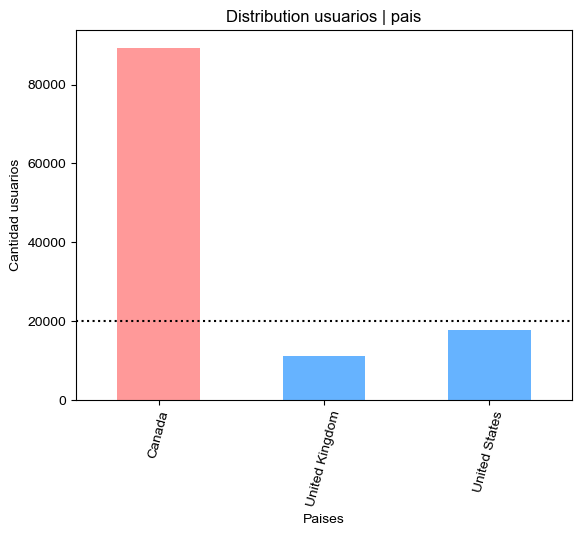

In [5]:
df = pd.merge(df_transactions, df_users, left_on='user_id', right_on='id', how='inner')
usuarios_pais = df.groupby('country')['user_id'].sum()

metas = ['#ff9999' if valor > 20000 else '#66b3ff' for valor in usuarios_pais]

usuarios_pais.plot(kind='bar', color=metas)

sns.set_theme(rc={'figure.figsize':(6,6)}) 
plt.xticks(rotation=75, fontsize=10)
plt.title("Distribution usuarios | pais")
plt.axhline(y=20000, color='black', linestyle=':') 
plt.xlabel("Paises")
plt.ylabel("Cantidad usuarios")
plt.show()

# - Ejercicio 6
### Tres variables.

INTERPRETACION

En este grafico Alemnania y Reuno Unido lideran con el maximo de transactiones (montos).
Conforme la meta establecida de transacciones (20 operaciones) lo superaron Canada, Irlanda, Noruega, Suecia, apesar de no liderar el mercado.
Los ultimos paises mencioando, en relacion a sus transacciones y su indice de operaciones declinadas es muy bajo a diferencia de los demas paises que tienen un indice de delicnaciones de aproximadamente un 40%.
El pais con la proyeccion mas baja y un alto indice de operaciones declinadas es España

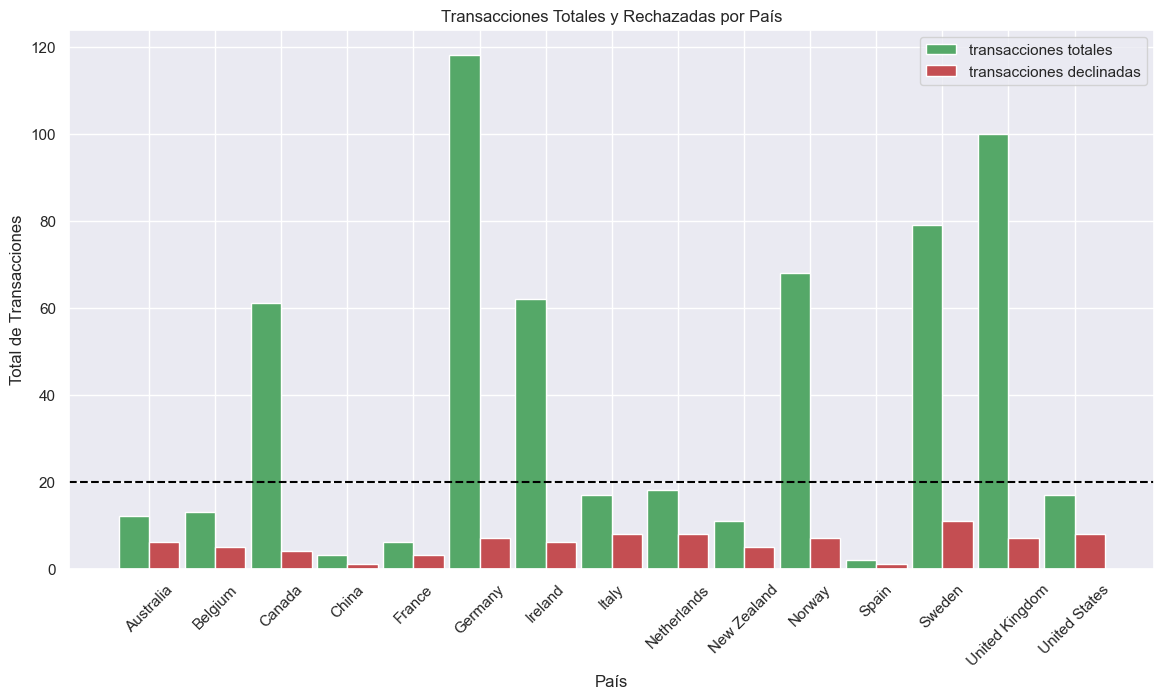

In [49]:
df = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id', how='inner')

MontosPais = df.groupby('country')['id'].count()
DeclinadosPais = df.groupby('country')['declined'].sum()

labels = MontosPais.index
ttotales = MontosPais.values
tdeclinadas = DeclinadosPais.values
bar_width = 0.46

x = np.arange(len(labels))
plt.figure(figsize=(14, 7))
plt.bar(x - bar_width/2, ttotales, width=bar_width, label='transacciones totales', color='g')
plt.bar(x + bar_width/2, tdeclinadas, width=bar_width, label='transacciones declinadas', color='r')
plt.xlabel('País')
plt.ylabel('Total de Transacciones')
plt.title('Transacciones Totales y Rechazadas por País')
plt.axhline(y=20, color='black', linestyle='--')  
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.show()

# - Ejercicio 7
### Graficar un Pairplot.

F A S E - 1:
Generamos importancion de bibliotecas, establecemos una nueva conexión a una base de datos MySQL nombrada db_sprint8 y por medio de un funcion de python extramos los dataframes de interes de "df_iris"
- pandas: Se utiliza para la manipulación de datos y la creación de marcos de datos.
- seaborn: Proporciona visualizaciones estadísticas avanzadas.
- matplotlib.pyplot: Ofrece funcionalidades básicas de trazado.
- numpy: Se utiliza para operaciones numéricas (no se utiliza directamente en este código específico).
- mysql.connector: Permite la conexión a una base de datos MySQL.

F A S E - 2:
Este fragmento de código de Python llama las bibliotecas como pandas (pd) y seaborn (sns) para generar una visualización del conjunto de datos df_iris.

PROCEDIMIENTO:
- Tema de configuración : configura el aspecto general de la trama, probablemente ajustando el tamaño de la figura ( ) a una dimensión grande (30x30 pulgadas). sns.set_themefigsize
- Pairplot : crea una matriz de diagramas de dispersión, donde cada subtrama visualiza la relación entre dos características (columnas) en el DataFrame. sns.pairplotdf_iris
- Eliminación de etiquetas : , y elimine títulos y etiquetas de eje predeterminados, potencialmente para una presentación más limpia o una personalización posterior . plt.title("") plt.xlabel("")plt.ylabel("")
- Mostrando gráfico : muestra el gráfico de pares generado. plt.show()

RESUMEN
Este código crea una visualización completa del conjunto de datos de df_iris mediante un diagrama de pares. Cada subtrama dentro de la matriz revela la correlación y características, proporcionando información sobre las relaciones dentro de los datos.

INTERPRETACION
Las variables sepal length, sepal width, petal length y petal width están todas correlacionadas positivamente entre sí. Esto significa que tienden a aumentar o disminuir juntas, osea que existe una cierta correlación entre todas las variables de dimensiones, es decir incrementa una de las variables incrementa la flor en general.
La correlación más fuerte es entre 'petal length' y 'petal width', seguida de la correlación entre 'sepal length' y 'petal length'.
En la variedad Setosa, que contienen dimensiones pequeñas, definen en el grafico que el tamaño mas grande de su sepalo no se relaciona necesariamente con un tamaño mayor de pétalo.

In [5]:
########################################### FASE 1 ############################################ 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mysql.connector
db = mysql.connector.connect(host='xxxxxx',
                            port='xxxx',
                            database='xxxxxxx',  
                            user='root',
                            password='xxxxxx')

def load_table_to_dataframe(db, cursor, table_name):             # Cargo c/tabla en un Pandas DataFrame.                                                     
    try:
        df = pd.DataFrame()                                      # Creo un DataFrame vacío para la tabla
        cursor.execute(f"SELECT * FROM {table_name}")            # Ejecuto la consulta para extraer tablas
        column_names = [col[0] for col in cursor.description]    # Obtengo los nombres de las columnas
        data = cursor.fetchall()
        data_list = []                                           # Convierto los datos a un formato Dataframe
        for row in data:
            data_list.append(list(row))
        df = pd.DataFrame(data_list, columns=column_names)       # Creo el DataFrame (datos y nombres de columnas)
        return df
    except Exception as e:
        print(f"Error loading table '{table_name}':", e)
        return None

cursor = db.cursor()
cursor.execute("SHOW TABLES")
tables = [tabla[0] for tabla in cursor.fetchall()]
print('-'*55)
print('           >>>> DATAFRAMES ENCONTRADOS <<<<')
print('-'*55)

for table_name in tables:
    df_name = f"df_{table_name.lower()}"  # Convierto el nombre de la tabla a minúsculas con prefijo 'df_'
    df = load_table_to_dataframe(db, cursor, table_name)
    if df is None:
        continue

    globals()[df_name] = df  # Creo una variable global con el nombre dinámico y configuro en el DataFrame
    print(f"DataFrame: {df_name}")  # Imprimo el nombre del DataFrame
    
cursor.close()  # Desconexión
db.close()

-------------------------------------------------------
           >>>> DATAFRAMES ENCONTRADOS <<<<
-------------------------------------------------------
DataFrame: df_iris
DataFrame: df_titanic


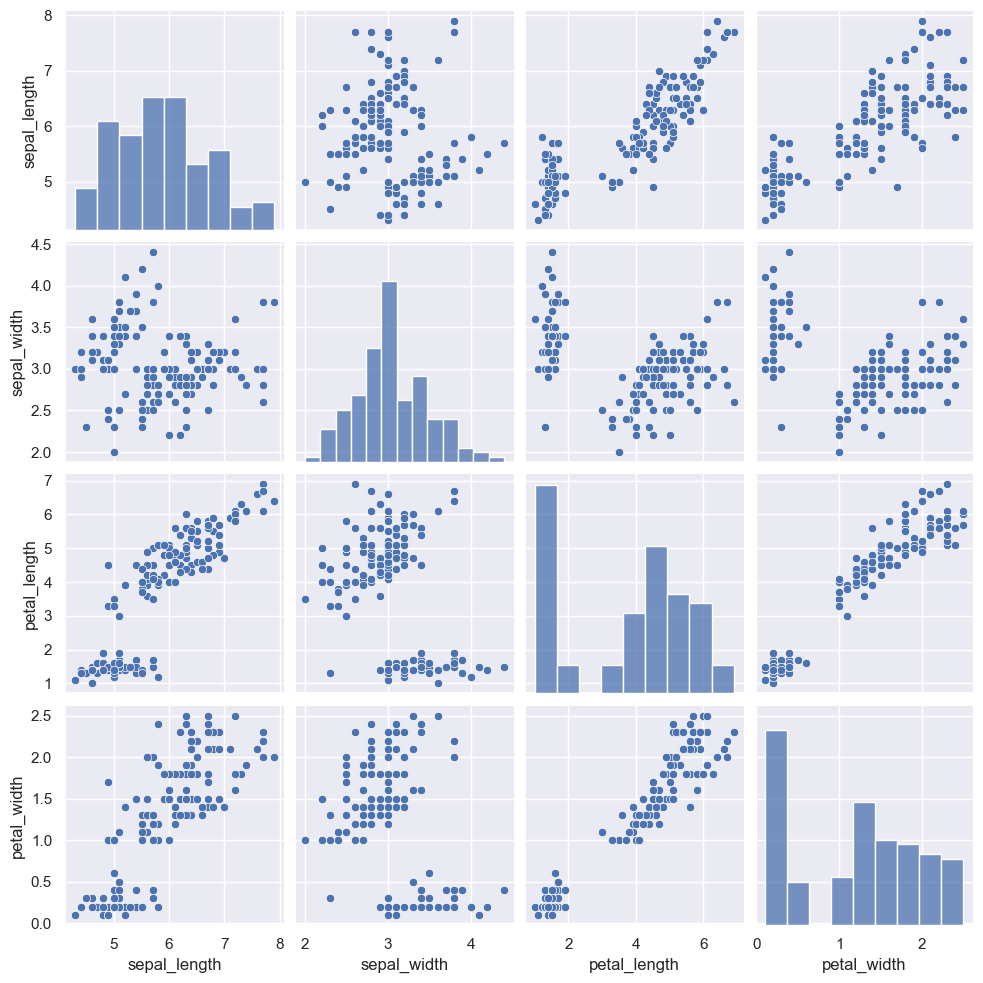

In [215]:
########################################### FASE 2 ############################################ 
df_iris

sns.set_theme(rc={'figure.figsize':(30, 30)})
sns.pairplot(data=df_iris)
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.show()

# NIVEL 2
## EJERCICIO 1
### Correlación de todas las variables numéricas.

Este código aprovecha los datos de memoria en cuanto a importacion de bibliotecas, extracción de datos de df_iris y formula los siguientes pasos posteriores:

El código explora las relaciones entre las características del conjunto de datos de df_iris mediante visualización y análisis de correlación.

MATRIX DE CORRELACION:
- correlation_matrix = df_iris.corr(): Esta línea calcula los coeficientes de correlación entre todos los pares de características en el DataFrame df_iris. La correlación mide cuánto cambian dos variables juntas. Varía de -1 (correlación perfectamente negativa) a 1 (correlación perfectamente positiva) y 0 indica que no hay relación lineal.
- El código imprime la matriz de correlación calculada en la consola. Esta matriz muestra el coeficiente de correlación entre cada característica (columna) y todas las demás características (fila).

MAPAS DE CALOR:
- sns.heatmap(df_iris.corr(), annot=True): Esta línea crea una visualización de mapa de calor de la matriz de correlación utilizando la seabornbiblioteca. Los mapas de calor utilizan la intensidad del color para representar los valores de correlación: el rojo indica correlación positiva, el azul indica correlación negativa y el blanco indica ausencia de correlación.
- annot=True este argumento muestra los coeficientes de correlación reales dentro de cada celda del mapa de calor para una mejor interpretación.

RESUMEN:
Este fragmento de código proporciona un análisis completo de las relaciones entre las características del conjunto de datos de df_iris. Calculando los coeficientes de correlación, los imprime para una inspección detallada y los visualiza utilizando un mapa de calor codificado por colores. Este análisis ayuda a identificar características que están altamente correlacionadas o son independientes, lo que puede ser valioso para tareas como la selección de características en modelos de aprendizaje automático

INTERPRETACION
Podemos ver una correlacion dominante entre Petal length y petal width, esta correlación entre estas dos variables es positiva y muy fuerte (aproximadamente 0,96). Esto significa que las dos variables están muy estrechamente relacionadas y tienden a aumentar o disminuir juntas.
Ademas, podemos ver que Sepal length y petal length: La correlación entre estas dos variables es positiva y fuerte (aproximadamente 0,87). Esto significa que las dos variables están estrechamente relacionadas y tienden a aumentar o disminuir juntas.
Sepal length y petal width: La correlación entre estas dos variables es positiva y algo fuerte (aproximadamente 0,82). Esto significa que las dos variables están estrechamente relacionadas y tienden a aumentar o disminuir juntas.
las demas corelaciones son debiles de las cuales  no superan los 40 puntos

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000



C:\Users\SINERGIA\AppData\Local\Temp\ipykernel_3936\647576285.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_iris.corr()
C:\Users\SINERGIA\AppData\Local\Temp\ipykernel_3936\647576285.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_iris.corr(), annot=True)


<Axes: >

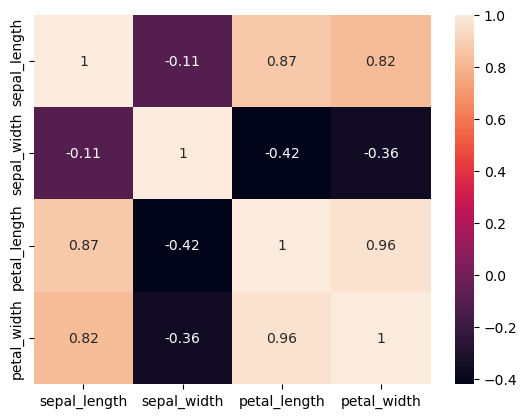

In [7]:
correlation_matrix = df_iris.corr() 

print("Correlation Matrix:")
print(correlation_matrix)
print()

sns.heatmap(df_iris.corr(), annot=True)


Este código Python realiza análisis de regresión lineal y visualización de las dimensiones de los pétalos (largo y ancho) del conjunto de datos de df_iris, desglose del código:

REGRESION LINEAL:
Extraemos la longitud del pétalo (valores x) y el ancho del pétalo (valores y) del DataFrame.
Usamos linregress de scipy para realizar una regresión lineal sobre los datos obtenidos.
Esta función calcula y devuelve lo siguiente:
- Pendiente: El coeficiente de la ecuación lineal (describe la pendiente de la línea).
- Interceptar: La intersección del eje y de la línea de regresión.
- R-cuadrado: El coeficiente de determinación (mide la bondad de ajuste).
- Valor p: La significancia estadística de la relación (los valores p más bajos indican una correlación más fuerte).
- Error estándar: El error estándar de la estimación de la pendiente.
- Imprime los valores calculados.

VISUALIZACION:
Creamos un diagrama de dispersión usando seaborn para visualizar la relación entre la longitud y el ancho de los pétalos.
Utilizamos la pendiente y la intersección obtenidas de la regresión para generar una ecuación lineal de mejor ajuste (slope*x_value_lr+intercept).
Trazamos esta línea de mejor ajuste encima del diagrama de dispersión usando un color rojo y etiquetada como "Regresión lineal".
Agregamos etiquetas y títulos al gráfico para mayor claridad, mostramos de esta forma la visualización combinada.
En general, este código analiza eficazmente la relación lineal entre la longitud y el ancho de los pétalos en el conjunto de datos de Iris. Realiza regresión lineal, calcula estadísticas relevantes y creamos un diagrama de dispersión con la línea de regresión para representar visualmente los hallazgos.



Slope: 0.41641913228540123
Intercept: -0.3665140452167277
R-squared: 0.9269012279220042
P-value: 5.776660988491603e-86
Standard error: 0.009612539319328553


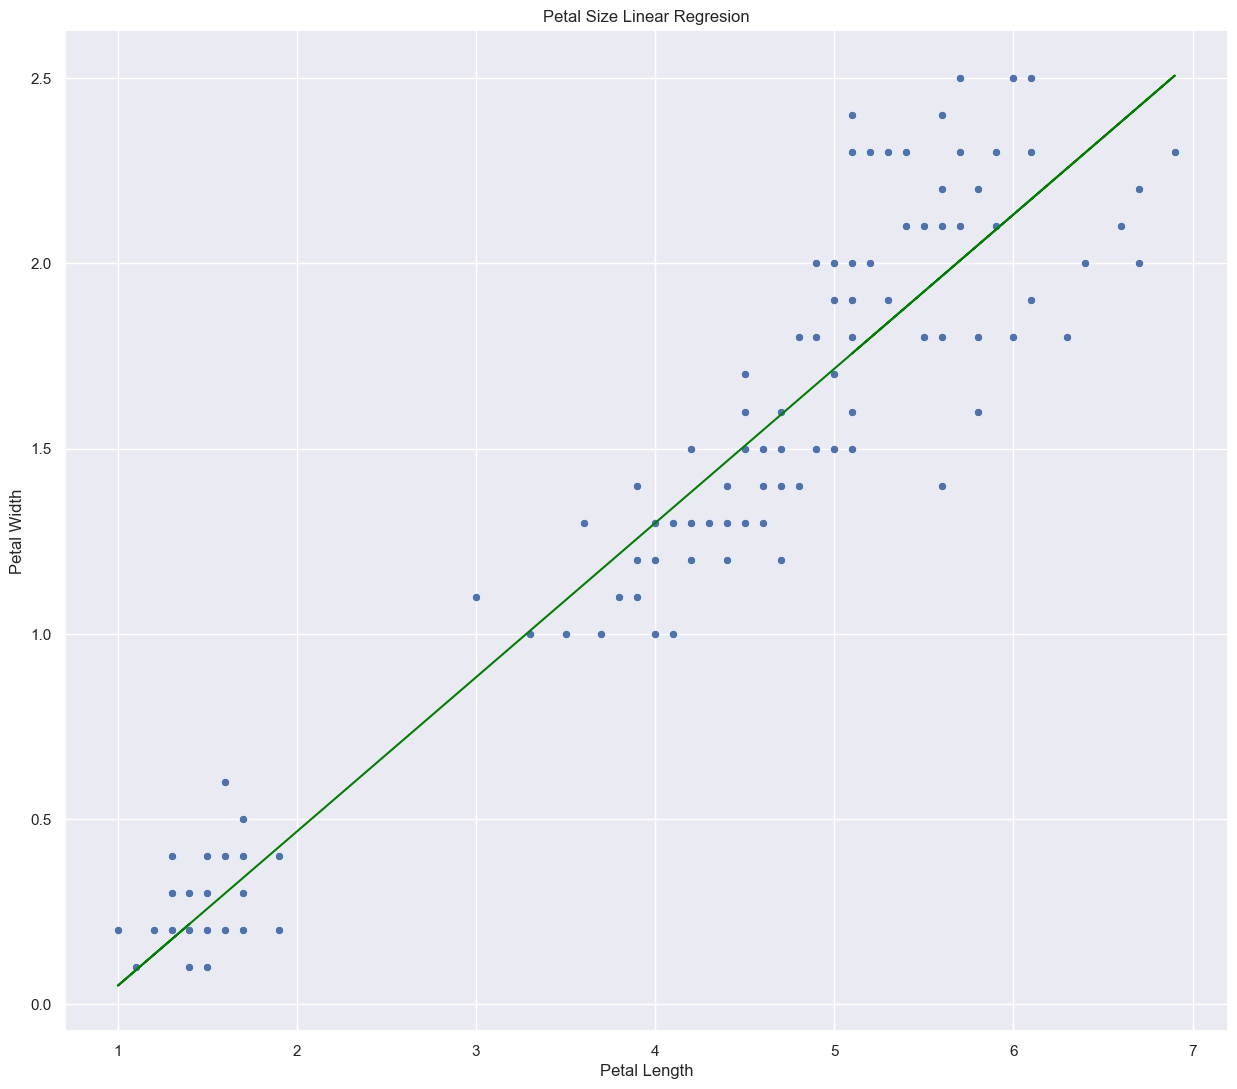

In [23]:
x_value_lr = df_iris['petal_length']
y_value_lr = df_iris['petal_width']

slope, intercept, r_value, p_value, std_err = linregress(x_value_lr, y_value_lr) 

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard error:", std_err)

sns.scatterplot(data=df_iris, x='petal_length', y='petal_width')
plt.plot(x_value_lr, slope*x_value_lr+intercept, color='green', label='Linear Regression') 
plt.title("Petal Size Linear Regresion")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

# EJERCICIO 2
### Implementa un jointplot.

Usando previamente las bibliotecas y los datos cargados en memoria sobre el df_iris del ejercicio anterior, procedemos lo siguiente:

VISUALIZACION:
Establecemos el tamaño de la figura para el gráfico usando 'sns.set_theme'.
Se crea una trama conjunta con Seaborn (sns.jointplot),visualizando la relación entre el ancho del sépalo y el largo de los pétalos, mientras definimos por color las especies (paleta colores pastel).
Agregamos título y etiquetas para los ejes x e y.


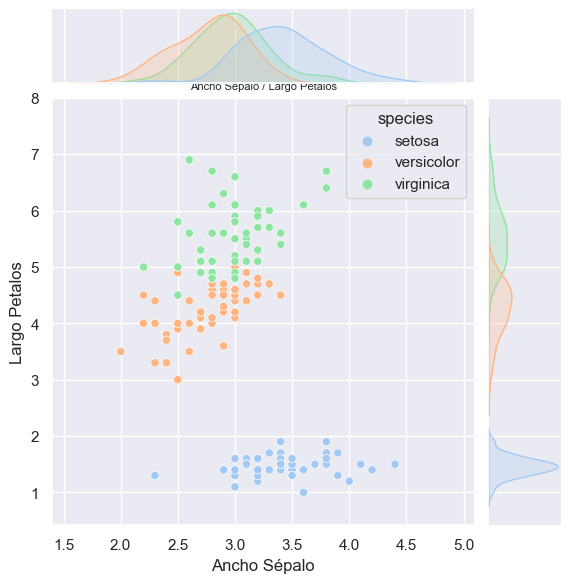

In [11]:
sns.set_theme(rc={'figure.figsize':(20, 10)})
sns.jointplot(data=df_iris, x='sepal_width', y='petal_length', hue='species', palette='pastel')
plt.title("Ancho Sépalo / Largo Petalos", fontsize=8)
plt.xlabel("Ancho Sépalo")
plt.ylabel("Largo Petalos")
plt.show()

# NIVEL 3
## EJERCICIO 1

### Implementa un violinplot combinado con otro tipo de gráfico.

Usando previamente las bibliotecas y los datos cargados en memoria sobre el df_iris del ejercicio anterior, procedemos lo siguiente:

VISUALIZACION:
Creamos un diagrama de violín seaborn.violinplot para visualizar la distribución de la longitud de los sépalos en diferentes especies de flores.
showmeans=True muestra los valores medios dentro del gráfico del violín. Crea un diagrama de caja usando seaborn.boxplot para mostrar la distribución con cuartiles y posibles valores atípicos, nuevamente con especies en el eje x y longitud de sépalo en el eje y.

PERSONALIZACION:
Establecemos el tamaño de la figura para el gráfico usando sns.set_theme.
Con esta opcion tenemos las posibilidad de girar las etiquetas a conveniencia del eje x (species), 
para mejor legibilidad, aunque este no fue el caso.
Establecemos el tamaño de fuente para las etiquetas de marca del eje x.
Agregamos un título,etiqueta del eje x,y etiqueta del eje y para mayor claridad.
Muestra la visualización generada usando plt.show().

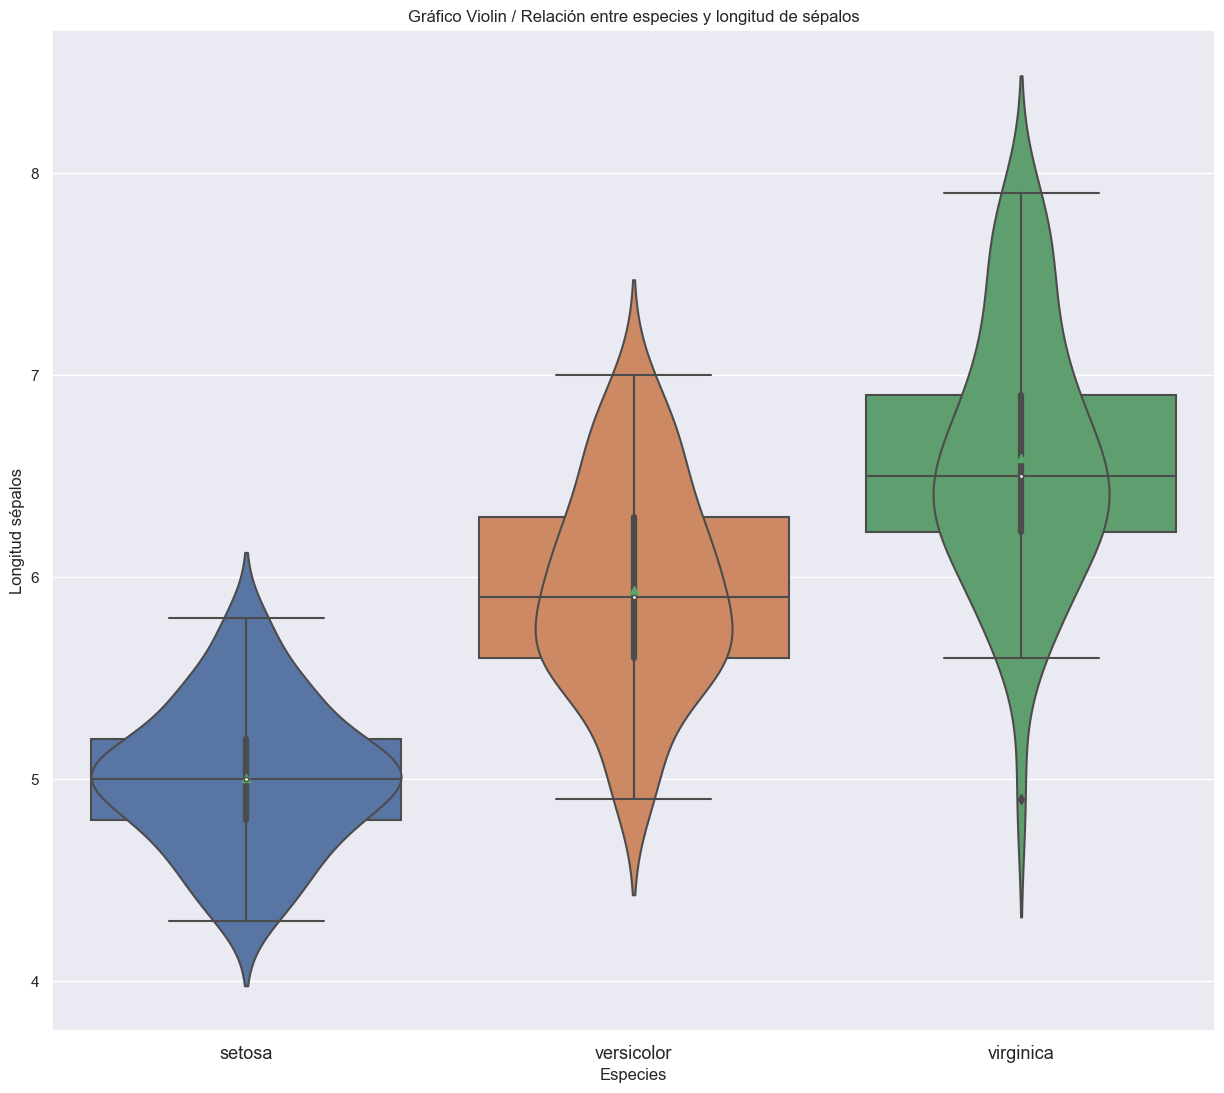

In [20]:
sns.violinplot(data=df_iris, x="species", y="sepal_length", showmeans=True)
sns.boxplot(data=df_iris, x="species", y="sepal_length", showmeans=True)

sns.set_theme(rc={'figure.figsize':(15, 13)})
plt.xticks(rotation=0, fontsize=13)
plt.title("Gráfico Violin / Relación entre especies y longitud de sépalos")
plt.xlabel("Especies")
plt.ylabel("Longitud sépalos")
plt.show()


# Ejercicio 2
### Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.

F A S E - 1:
Generamos importacion de bibliotecas, establecemos una nueva conexión a una base de datos MySQL nombrada db_sprint8 y por medio de un funcion de python extramos los datafrfames de interes "df_titanic":
- pandas: Se utiliza para la manipulación de datos y la creación de marcos de datos.
- seaborn: Proporciona visualizaciones estadísticas avanzadas.
- matplotlib.pyplot: Ofrece funcionalidades básicas de trazado.
- numpy: Se utiliza para operaciones numéricas (no se utiliza directamente en este código específico).
- mysql.connector: Permite la conexión a una base de datos MySQL.

F A S E - 2:
Este código Python crea una visualización FacetGrid utilizando seaborn para explorar las relaciones del nuevo dataframe df_titanic, entre la supervivencia de los pasajeros, la clase (Pclass), el sexo y la edad en un conjunto de datos del Titanic.

PERSONALIZACION.
- Creamos de FacetGrid: el código se utiliza sns.FacetGridpara crear una cuadrícula de subtramas basadas en dos variables categóricas: (clase de pasajero) para columnas y (estado de supervivencia) para filas. Dentro de cada subtrama, Pclass Survived diferencia aún más los pasajeros por Sex.

ETIQUETAS Y TITULO:
El grafico se titula "Gráfico:Facet Grid" e incluye etiquetas para PassengerId y Age en los ejes x e y, respectivamente. También se añade una leyenda para diferenciar puntos en función del Sexo. Finalmente, el código muestra la visualización FacetGrid generada.

RESUMEN:
Este código pretende investigar visualmente cómo la edad y las características de los pasajeros (clase, sexo) podrían estar relacionadas con la supervivencia en el Titanic. FacetGrid permite una exploración más detallada al considerar estos factores simultáneamente.

In [18]:
########################################### FASE 1 ############################################ 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import mysql.connector
db = mysql.connector.connect(host='xxxxxx',
                            port='xxxx',
                            database='xxxxxxx',  
                            user='root',
                            password='xxxxxx')

def load_table_to_dataframe(db, cursor, table_name):             # Cargo c/tabla en un Pandas DataFrame.                                                     
    try:
        df = pd.DataFrame()                                      # Creo un DataFrame vacío para la tabla
        cursor.execute(f"SELECT * FROM {table_name}")            # Ejecuto la consulta para extraer tablas
        column_names = [col[0] for col in cursor.description]    # Obtengo los nombres de las columnas
        data = cursor.fetchall()
        data_list = []                                           # Convierto los datos a un formato Dataframe
        for row in data:
            data_list.append(list(row))
        df = pd.DataFrame(data_list, columns=column_names)       # Creo el DataFrame (datos y nombres de columnas)
        return df
    except Exception as e:
        print(f"Error loading table '{table_name}':", e)
        return None

cursor = db.cursor()
cursor.execute("SHOW TABLES")
tables = [tabla[0] for tabla in cursor.fetchall()]
print('-'*55)
print('           >>>> DATAFRAMES ENCONTRADOS <<<<')
print('-'*55)

for table_name in tables:
    df_name = f"df_{table_name.lower()}"  # Convierto el nombre de la tabla a minúsculas con prefijo 'df_'
    df = load_table_to_dataframe(db, cursor, table_name)
    if df is None:
        continue

    globals()[df_name] = df  # Creo una variable global con el nombre dinámico y configuro en el DataFrame
    print(f"DataFrame: {df_name}")  # Imprimo el nombre del DataFrame
    
cursor.close()  # Desconexión
db.close()

-------------------------------------------------------
           >>>> DATAFRAMES ENCONTRADOS <<<<
-------------------------------------------------------
DataFrame: df_iris
DataFrame: df_titanic


<Figure size 1000x600 with 0 Axes>

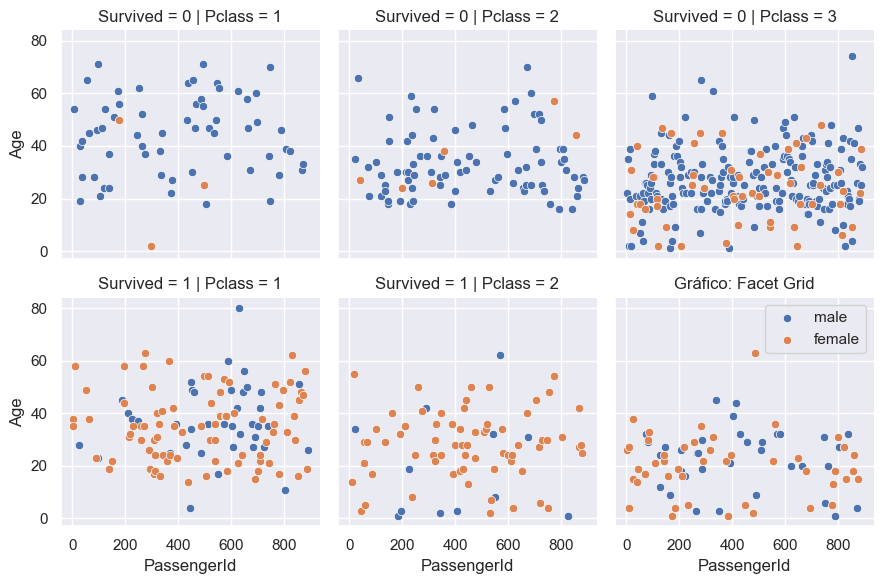

In [19]:
########################################### FASE 2 ############################################ 
plt.figure(figsize=(10, 6))

custom_palette = {'blue': '#43a2ca', 'pink': '#ffb6c1', 'orange': '#feb24c', 'green': '#31a354'}

g = sns.FacetGrid(df_titanic, col="Pclass", row='Survived', hue='Sex')
g.map(sns.scatterplot, "PassengerId", "Age")

plt.title('Gráfico: Facet Grid')
plt.xlabel('PassengerId')
plt.ylabel('Age')
plt.legend()
plt.show()